In [ ]:
import pandas as pd
import numpy as np


# **# 1. Data cleaning**

In [ ]:
df= pd.read_csv('/content/spam.csv',encoding='latin1')
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df=df.rename(columns={'v1':'target','v2':'text'})
df.head(6)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
df['target']=encode.fit_transform(df['target'])
df.duplicated().sum()
df=df.drop_duplicates()
df.head(4)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [ ]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# **3. Data Preprocessing**
**#Lower case**
#Tokenization
#Removing special characters
#Removing stop words and punctuation
#Stemming

In [ ]:
df['text']=df['text'].str.lower()


<ipython-input-5-680afa1755ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text']=df['text'].str.lower()


In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
df['words']=df['text'].apply(word_tokenize)
df.head(4)

,target,text,words
0,0,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail..."
1,0,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,1,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea..."


In [ ]:
def transfrom_text(text):
  ps =PorterStemmer()

  text=nltk.word_tokenize(text.lower())
  text=[i for i in text if i.isalnum()]
  text=[i for i in text if i not in stopwords.words('english')]
  text=[ps.stem(i) for i in text]

  return " ".join(text)


In [ ]:
transfrom_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['transfrom_text']=df['text'].apply(transfrom_text)


In [ ]:
df.head(5)

,target,text,words,transfrom_text
0,0,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail...",go jurong point crazi avail bugi n great world...
1,0,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]",ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea...",u dun say earli hor u c alreadi say
4,0,"nah i don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,...",nah think goe usf live around though


In [ ]:
df['transfrom_text'][0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
#wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [ ]:
spam_wc=wc.generate(df[df['target']==1]['transfrom_text'].str.cat(sep=" "))
spam_wc

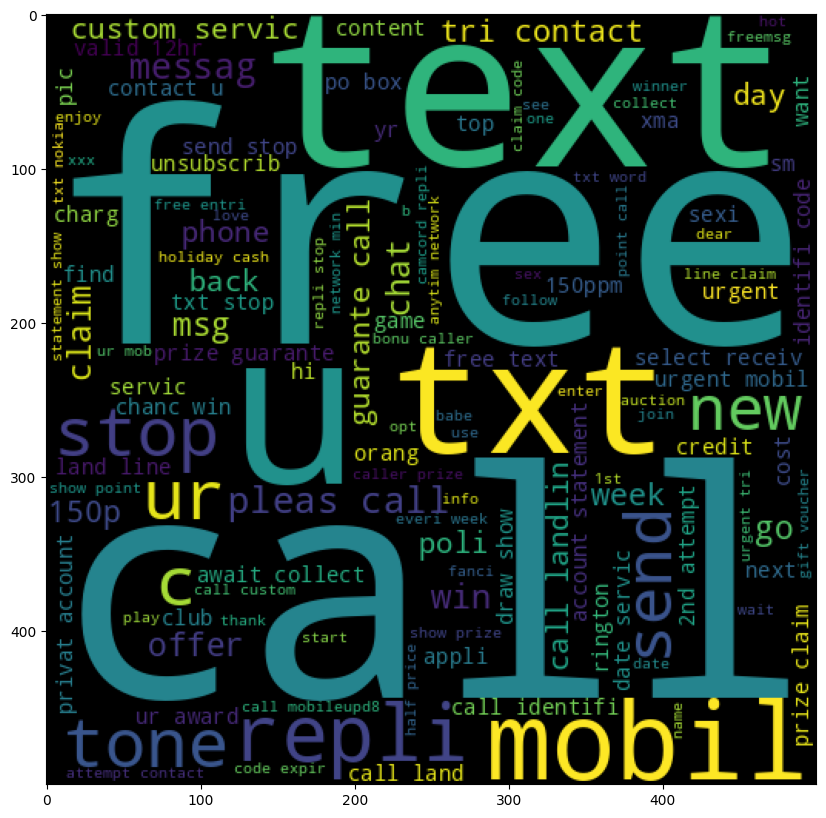

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['target']==0]['transfrom_text'].str.cat(sep=" "))
ham_wc

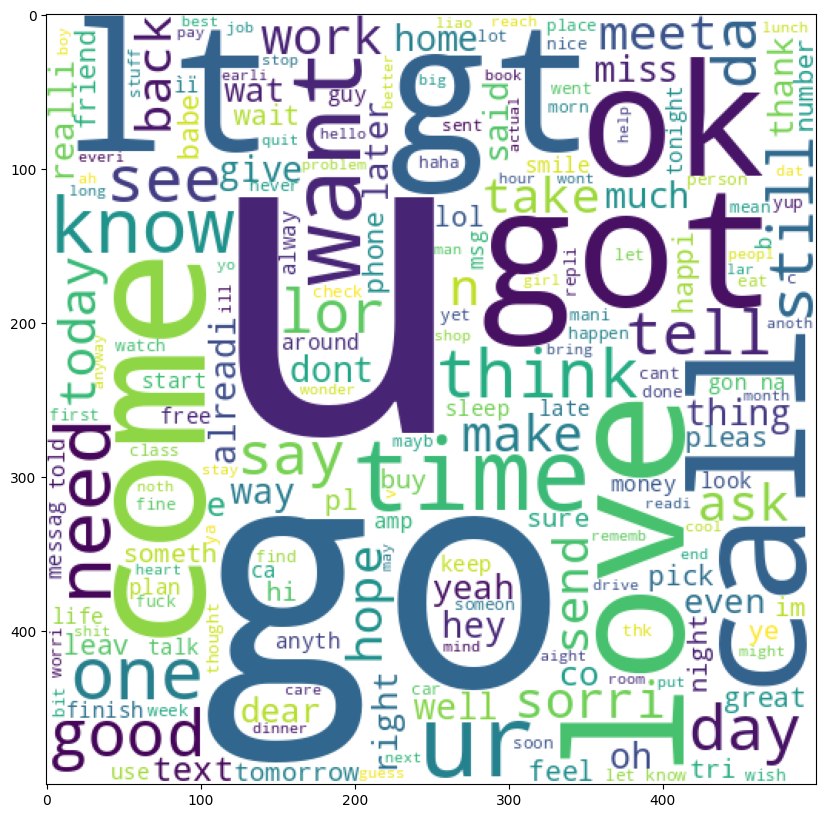

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(ham_wc)

In [ ]:
from collections import Counter

spam_corpus=[]
for msg in df[df['target']==1]['transfrom_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [ ]:
spam_word_freq=Counter(spam_corpus).most_common(30)
spam_df=pd.DataFrame(spam_word_freq,columns=["words","freq"])
spam_df.head(6)

,words,freq
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119


<ipython-input-53-2d852cd7733c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='words',y="freq",data=spam_df,palette='dark')


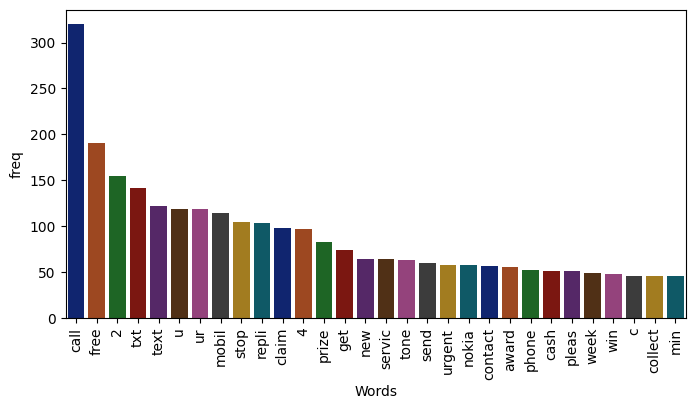

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.barplot(x='words',y="freq",data=spam_df,palette='dark')
plt.xticks(rotation=90)
plt.xlabel("Words")
plt.show()


In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['transfrom_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
ham_word_freq=Counter(ham_corpus).most_common(30)
ham_df=pd.DataFrame(ham_word_freq,columns=["words","freq"])
ham_df.head(6)

,words,freq
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284


<ipython-input-60-de9c3dbef9f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='words',y="freq",data=ham_df,palette='rocket')


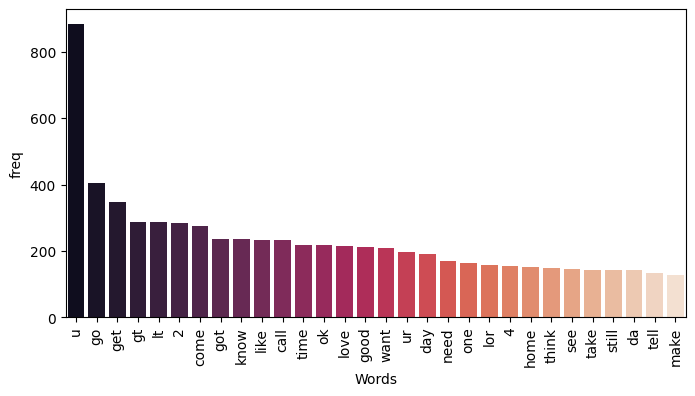

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='words',y="freq",data=ham_df,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel("Words")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv=CountVectorizer()

In [ ]:
import numpy as np
tfidf=TfidfVectorizer(max_features=3000)
x= tfidf.fit_transform(df['transfrom_text']).toarray()
y=df['target'].values


array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gn=GaussianNB()
mn=MultinomialNB()
bn =BernoulliNB()

In [ ]:
gn.fit(x_train,y_train)
y_pred1=gn.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
mn.fit(x_train,y_train)
y_pred2=mn.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
bn.fit(x_train,y_train)
y_pred3=bn.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mn,open('model.pkl','wb'))

In [ ]:
!pip install streamlit  -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.197.92.139


In [ ]:
! streamlit run sms.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.197.92.139:8501

⠦⠧⠇Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙your url is: https://shy-monkeys-type.loca.lt
